# **BLM 4800 HOWEWORK II DECISION TREES**




# HOMEWORK SUBJECT

In this homework, you are going to find a solutotion for a wheat company. 
The wheat company sells two types of thing:
- specialty wheat with kilogram
- Other things

You should make a decision tree to predict the purchase of the loyal customers:
The collected data includes  customers':
- age
- gender 
- salary 
- whether they have bought at least one wheat product online
- their distance from the store  (standardized to a number between 0 and 11) 
- how much they spent on wheat products on the week of the survey 
- how much they spent on wheat products in the month preeding the survey
- the number of  shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the wheat, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy wheat, you will strike the deal with the wheat farmers and sell the wheat. Otherwise, you won't strike the deal. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on wheat products, how many kilogram  bags the customer bought over the last year, whether they have bought at least one  product online, and their distance, could predict whether customers would purchase the new wheat product.

# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
#import necessary packages

import pandas as pd #pandas
import numpy as np #numpy
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

#kütüphaneler kurulu değilse kurup gerekli kütüphaneleri importladık

## 1b. Load data 

In [2]:
# Read in the data to a variable called wheatData
wheatData = pd.read_csv(r'C:\Users\Fatih\Desktop\Dersler\Veri Madenciliğine Giriş\WheatCustomerDataSet.csv', index_col=None)

#wheatData adındaki değişkene elimizdeki veriyi okuyup atadık
#ben elimdeki datayı local'den okudum kendiniz çalıştırmak isterseniz colab'a veri setini ekleyip ordan da çalıştıraiblirsiniz

## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [3]:
# Call head() on your data 
wheatData.head()

#head() ile verinin ilk 5 satırına baktık

,Age,Gender,num_Bags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [4]:
# Call .shape on your data
wheatData.shape

#shape ile verinin satır ve sütun bilgisine baktık

(702, 9)

In [5]:
# Call info() on your data
wheatData.info()

#info() ile satır, sütun, veri tipleri, ve hafızadaki yerini inceledik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                702 non-null    int64  
 1   Gender             702 non-null    object 
 2   num_Bags_per_year  702 non-null    int64  
 3   spent_week         702 non-null    int64  
 4   spent_month        702 non-null    int64  
 5   SlrAY              702 non-null    int64  
 6   Distance           702 non-null    float64
 7   Online             702 non-null    int64  
 8   Decision           474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [6]:
# Call describe() on your data to get the relevant summary statistics for your data 
wheatData.describe()

#describe() ile verinin özet şeklindeki istatistiklerini inceledik, ortalama değer, çeyrekler, min-max vb

,Age,num_Bags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [7]:
# Check out the names of our data's columns 
list(wheatData.columns)

#list() ile elimizdeki verinin sütunlarına baktık

['Age',
 'Gender',
 'num_Bags_per_year',
 'spent_week',
 'spent_month',
 'SlrAY',
 'Distance',
 'Online',
 'Decision']

In [8]:
# Make the relevant name changes to spent_week and spent_per_week.
newData = wheatData.rename(columns = {'spent_week': 'spent_last_week', 'spent_month': 'spent_last_month', 'SlrAY': 'salary',})

#verinin sütunlarındaki adları sırasıyla değiştirdik ve yeni bir değişkene atadık

In [9]:
# Check out the column names
list(newData.columns)

#sütunlar değişmiş mi diye kontrol ettik

['Age',
 'Gender',
 'num_Bags_per_year',
 'spent_last_week',
 'spent_last_month',
 'salary',
 'Distance',
 'Online',
 'Decision']

In [10]:
# Let's have a closer look at the gender column. Its values need cleaning.
list(newData.Gender)

#cinsiyet sütununa baktık bazı verilerin temizlenmesi gerektiğini gördük

['Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'female',
 'Female',
 'Female',
 'Male',
 'F',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'f ',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Fe

In [11]:
# See the gender column's unique values 
newData.Gender.unique()
# newData['Gender'].unique()

#unique() ile cinsiyet sütunundaki birbirinden farklı kelimeleri bulduk

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [12]:
# Replace all alternate values for the Female entry with 'Female'
newData.Gender.replace({'female': 'Female'}, inplace = True)
newData.Gender.replace({'F': 'Female'}, inplace = True)
newData.Gender.replace({'f': 'Female'}, inplace = True)
newData.Gender.replace({'f ': 'Female'}, inplace = True)
newData.Gender.replace({'FEMALE': 'Female'}, inplace = True)

#replace() ile cinsiyet sütunundaki yanlış yazılmış female'leri doğru şekilde Female olarak düzelttik

In [13]:
# Check out the unique values for the 'gender' column
newData.Gender.unique()

#tekrar unique() ile sütunu kontrol ettik baktık düzelmiş işlem tamam

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [14]:
# Replace all alternate values with "Male"
newData.Gender.replace({'MALE': 'Male'}, inplace = True)
newData.Gender.replace({'male': 'Male'}, inplace = True)
newData.Gender.replace({'M': 'Male'}, inplace = True)

In [15]:
# Let's check the unique values of the column "gender"
newData.Gender.unique()

#tekrar unique() ile sütunu kontrol ettik baktık düzelmiş işlem tamam

array(['Female', 'Male'], dtype=object)

In [16]:
# Check out the unique values of the column 'Decision'
newData.Decision.unique()

#şimdi evet hayırın olduğu karar sütununun birbirinden farklı değerlerine bakıyoruz

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [17]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
newData.Decision.replace({1.0: 'YES'}, inplace = True)
newData.Decision.replace({0.0: 'NO'}, inplace = True)

#1.0 ve 0.0 değerlerini sırasıyla YES ve NO olarak değiştirdik

In [18]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
newData.Decision.unique()

#kontrol ettik evet değişmiş

array(['YES', nan, 'NO'], dtype=object)

## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of Data with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [19]:
# NoPrediction will contain all known values for the decision
# Call dropna() on Data, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on Data
NOPrediction = newData.dropna()
NOPrediction.Decision.describe()
# NOPrediction.head(50) konntrol ettim olmuş mu diye

# dropna ile veride boş olan satırları siliyoruz ve bunu başka bir değişkene atıyoruz

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

<AxesSubplot: xlabel='Decision', ylabel='spent_last_week'>

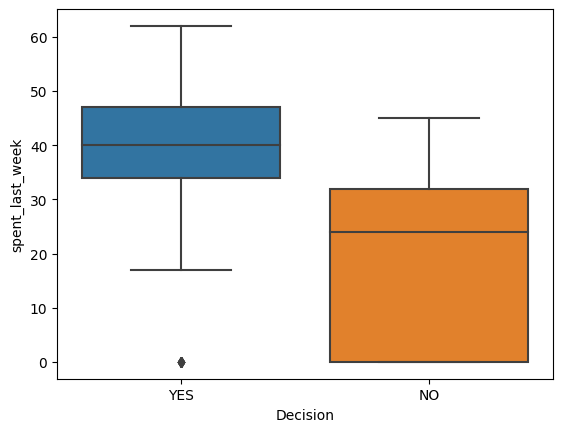

In [20]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
sns.boxplot(data = NOPrediction, x="Decision", y="spent_last_week")

#seaborn'un boxplot'u ile elimizdeki datanın kutu grafiği çizdirip x eksenine karar sütununu y eksenine anketin yapıldığı hafta ne kadar harcadıklarını koyuyoruz

Can you admissibly conclude anything from this boxplot? Write your answer here:

Geçen hafta ortalama 30-50 arası harcama yapanlar evet derken 30'un altında olanlar çoğunlukla hayır diyor

<AxesSubplot: xlabel='Distance', ylabel='spent_last_month'>

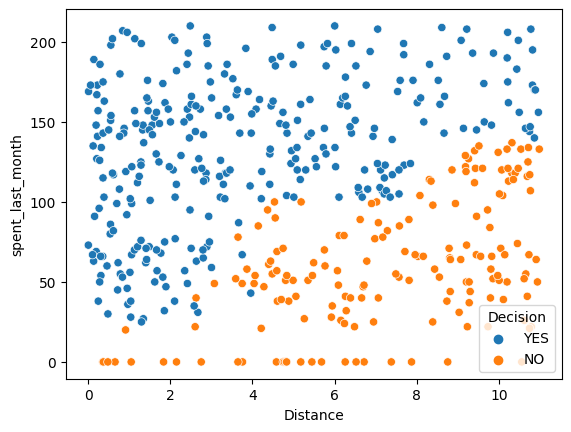

In [21]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(data = NOPrediction, x="Distance", y="spent_last_month", hue="Decision")

#seaborn'un scatterplot'u ile elimizdeki datanın saçılım grafiğini çizdirip x eksenine mağazaya uzaklıklarını y eksenine geçen ay ne kadar harcadıklarını koyuyoruz

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

Geçen ay harcama yapmayanlar her halükarda hayır diyor. Uzaklık 7 civarına gelene dek az harcama yapanlar dahil çoğunlukla evet diyor. Genel olarak uzaklık arttıkça evet deme miktarı azalıyor. 7 den sonra ise harcama miktarı ortalama 135 den yukarı olan azınlık evet diyor.

### 3. Get the subset of Data with null values in the Decision column, and save that subset as Prediction

In [22]:
# Get just those rows whose value for the Decision column is null  
Prediction = newData

#elimizdeki decision sütunundaki null değerlerin olduğu veriyi başka bir değişkene atıyoruz

In [23]:
# Call describe() on Prediction
Prediction.describe()

#describe() ile bu alt kümenin istatistik değerlerine bakıyoruz

,Age,num_Bags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000


### 4. Divide the NOPrediction subset into X and y

In [24]:
# Check the names of the columns of NOPrediction
list(NOPrediction.columns)

#list() methodu ile NOPrediction'un sütunlarına bakıyoruz

['Age',
 'Gender',
 'num_Bags_per_year',
 'spent_last_week',
 'spent_last_month',
 'salary',
 'Distance',
 'Online',
 'Decision']

In [25]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
features = ['Age',
 'Gender',
 'num_Bags_per_year',
 'spent_last_week',
 'spent_last_month',
 'salary',
 'Distance',
 'Online']

#features diye bir liste hazırlayıp başka bir değişkende Decision hariç sadece bu listenin içerisindeki özellikleri atıyoruz

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NOPrediction[features]

#X'e bu özellikleri atadık

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NOPrediction.Decision 

#Y'ye de Decision kolonunu atadık

### 5. Create dummy variables to deal with categorical inputs

First learn One-Hot Encoding. Please ask Google first then do this part.

One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [26]:
# One-hot encode all features in X.
X = pd.get_dummies(X, columns = ['Gender'])

display(X)

#One Hot Encode yöntemi ile kategorik olan Gender sütununu binary değerlere çeviriyoruz

,Age,num_Bags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Gender_Female,Gender_Male
0,36,0,24,73,42789,0.003168,0,1,0
2,24,0,39,119,30563,0.916005,1,0,1
4,24,0,20,36,14244,0.965881,0,1,0
5,20,0,23,28,14293,1.036346,1,1,0
6,34,0,55,202,91035,1.134851,0,1,0
...,...,...,...,...,...,...,...,...,...
696,29,5,20,74,29799,10.455068,0,1,0
697,45,5,61,201,80260,10.476341,0,1,0
698,54,5,44,116,44077,10.693889,1,0,1
699,63,5,33,117,43081,10.755194,1,0,1


### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [27]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=246, test_size=0.25)

#train_test_split() methodu ile test ve train verilerimizi belirtip test setinin boyutunu veriyoruz

# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [28]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=1234)

#bir değişken tanımlayıp bir karar ağacı classifier'i atanıyor ve model oluşturuluyor

# Call fit() on entr_model
entr_model.fit(X_train,y_train) 

#bu modelin kullanacağı veriler modele veriliyor

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

#test verisi predict() methoduna yollanarak gelen sonuçlar başka bir değişkende tutuluyor

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

#Series() methodu ile listeyi bir seriye çeviriyoruz ve index'li bir yapı haline geliyor

# Check out entr_model
entr_model

#modelimize bakıyoruz

DecisionTreeClassifier(criterion='entropy', random_state=1234)

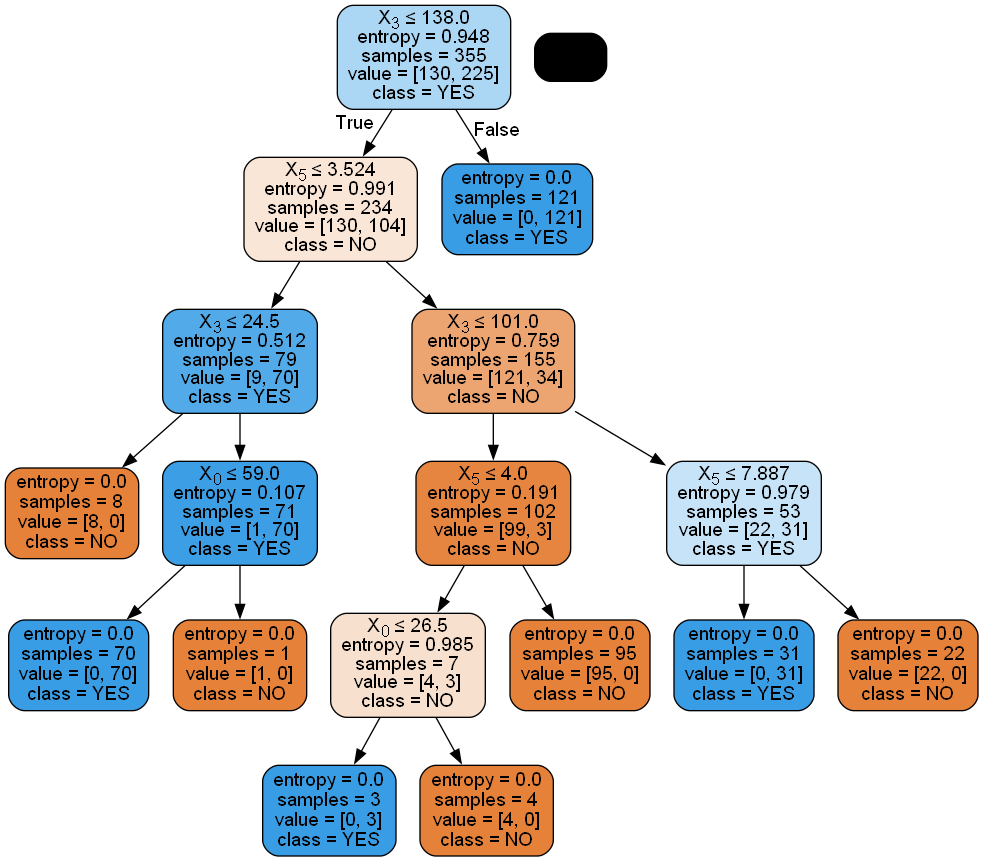

In [29]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=entr_model.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entr_model.png')
Image(graph.create_png())

#export_graphviz() ile modeli ve çıkış datasını belirtip ağacımızı class'larına göre renklendirerek bu ağacı görselleştiriyoruz

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [30]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

#modelin doğruluk değeri, precision ve recall değerlerine bakıyoruz

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


What can you infer from these results? Write your conclusions here:

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [31]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=1234) 

#bir değişken tanımlayıp bir karar ağacı classifier'i atanıyor ve model oluşturuluyor

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train,y_train)

#bu modelin kullanacağı veriler modele veriliyor

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test) 

#test verisi predict() methoduna yollanarak gelen sonuçlar başka bir değişkende tutuluyor

# Turn y_pred into a series, as before
pd.Series(y_pred) 

#Series() methodu ile listeyi bir seriye çeviriyoruz ve index'li bir yapı haline geliyor

# Check out gini_model
gini_model

#modelimize bakıyoruz

DecisionTreeClassifier(random_state=1234)

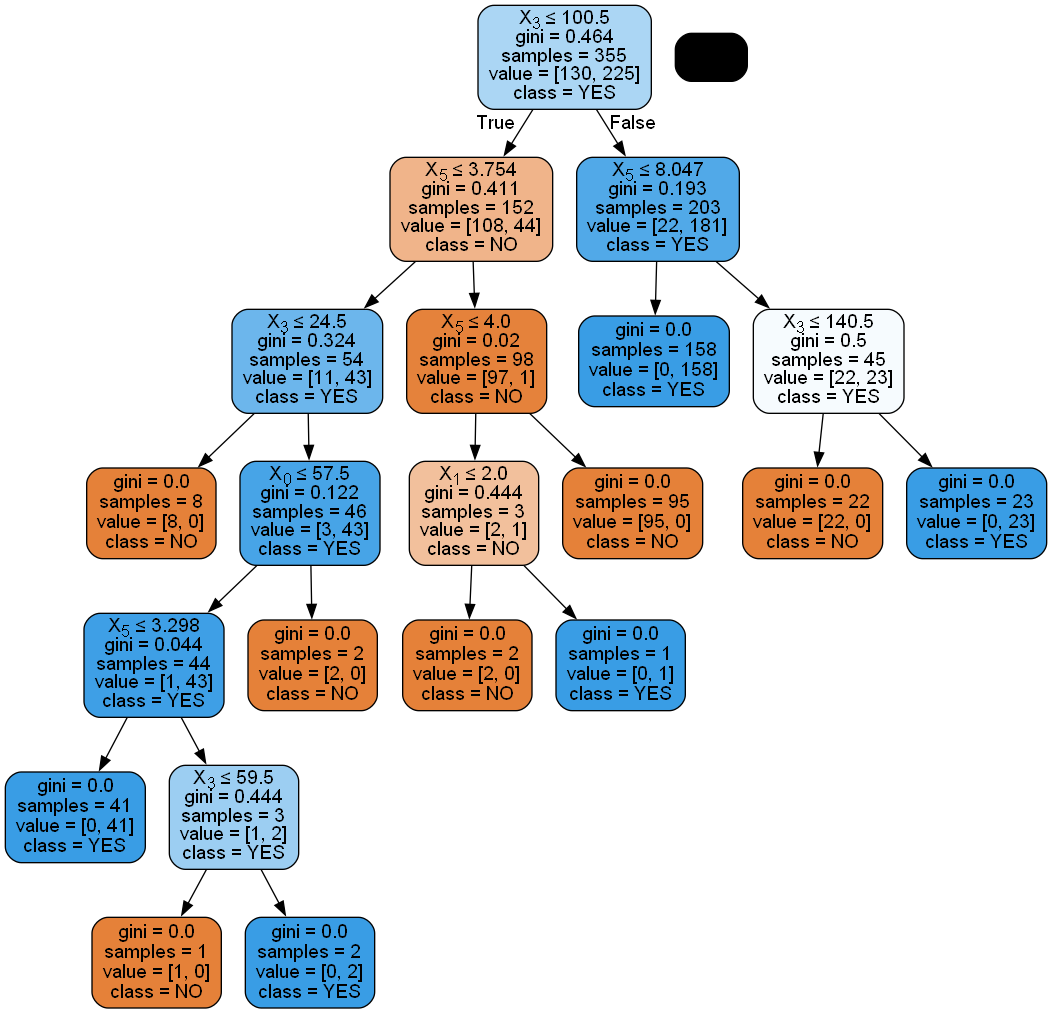

In [32]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(gini_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=gini_model.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gini_model.png')
Image(graph.create_png())

#export_graphviz() ile modeli ve çıkış datasını belirtip ağacımızı class'larına göre renklendirerek bu ağacı görselleştiriyoruz

In [33]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

#modelin doğruluk değeri, precision ve recall değerlerine bakıyoruz

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


How do the results here compare to the previous model? Write your judgements here: 

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [34]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=1234, max_depth = 3)

#bir değişken tanımlayıp bir karar ağacı classifier'i atanıyor ve model oluşturuluyor

entr_model2.fit(X_train,y_train) 

#bu modelin kullanacağı veriler modele veriliyor

y_pred = entr_model2.predict(X_test)

#test verisi predict() methoduna yollanarak gelen sonuçlar başka bir değişkende tutuluyor

pd.Series(y_pred)

#Series() methodu ile listeyi bir seriye çeviriyoruz ve index'li bir yapı haline geliyor

entr_model2

#modelimize bakıyoruz

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

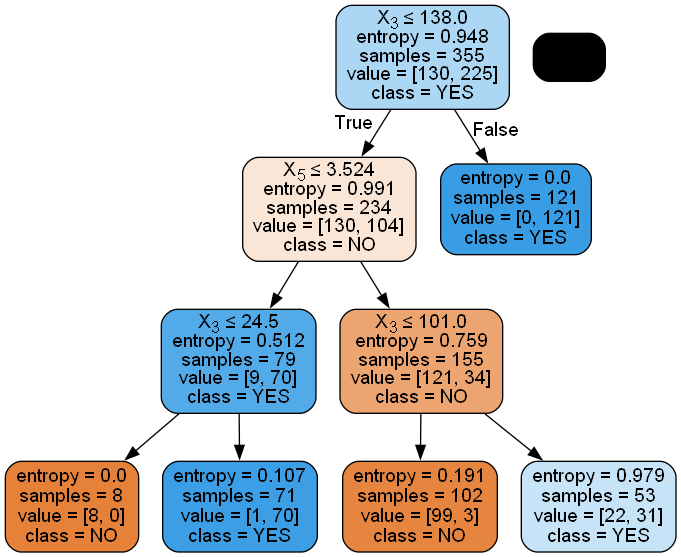

In [35]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model2, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=entr_model2.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entr_model2.png')
Image(graph.create_png())

#export_graphviz() ile modeli ve çıkış datasını belirtip ağacımızı class'larına göre renklendirerek bu ağacı görselleştiriyoruz

In [36]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

#modelin doğruluk değeri, precision ve recall değerlerine bakıyoruz

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes" 0.8764044943820225
Recall score for "No" 0.7317073170731707


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [37]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion ='gini', random_state=1234, max_depth = 3 )

#bir değişken tanımlayıp bir karar ağacı classifier'i atanıyor ve model oluşturuluyor

gini_model2.fit(X_train,y_train) 

#bu modelin kullanacağı veriler modele veriliyor

y_pred = gini_model2.predict(X_test) 

#test verisi predict() methoduna yollanarak gelen sonuçlar başka bir değişkende tutuluyor

pd.Series(y_pred) 

#Series() methodu ile listeyi bir seriye çeviriyoruz ve index'li bir yapı haline geliyor

gini_model2

#modelimize bakıyoruz

DecisionTreeClassifier(max_depth=3, random_state=1234)

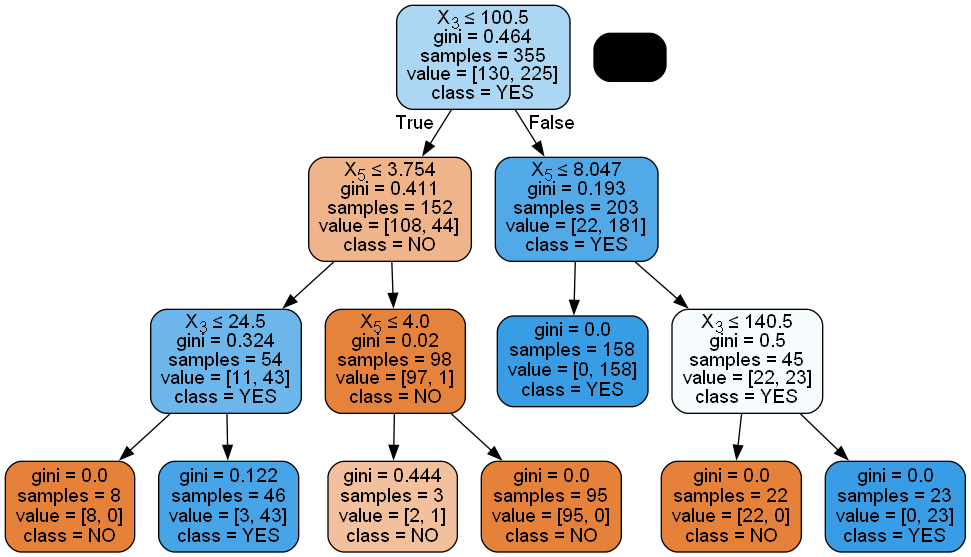

In [38]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(gini_model2, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=gini_model2.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gini_model2.png')
Image(graph.create_png())

#export_graphviz() ile modeli ve çıkış datasını belirtip ağacımızı class'larına göre renklendirerek bu ağacı görselleştiriyoruz

In [39]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

#modelin doğruluk değeri, precision ve recall değerlerine bakıyoruz

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

# 4. Evaluating and concluding
## 4a. How many customers will buy new Wheat Product? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the product. 

In [40]:
# Call value_counts() on the 'Decision' column of the original Data
wheatData.Decision.value_counts()

#ham verinn Decision sütunundaki değerlerimiz kaç tane ona bakıyoruz 

1.0    303
0.0    171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the new Wheat product. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [41]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = ['Age',
 'Gender',
 'num_Bags_per_year',
 'spent_last_week',
 'spent_last_month',
 'salary',
 'Distance',
 'Online']

#feature_cols diye bir liste hazırlayıp başka bir değişkende Decision hariç sadece bu listenin içerisindeki özellikleri atıyoruz

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]

#new_X e bu sütundaki özellikleri atıyoruz

In [42]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X, columns = ['Gender'])

#new_x'e one hot encode yapıp Gender'ı binary değere çeviroyruz

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)

#potential_buyers diye bir değişken oluşturup seçtiğimiz herhangş bir modele göre tahminleme yapıyoruz

In [43]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

#daha sonra bu değişkendeki YES ve NO sayısına bakıyoruz bakalım model nasıl tahminlemiş

(array(['NO', 'YES'], dtype=object), array([213, 489], dtype=int64))

The total number of potential buyers is 303 + 183 = 486

In [44]:
# Print the total number of surveyed people 
len(wheatData)

#listedeki kişi sayısını yazdırıyoruz

702

In [45]:
# Let's calculate the proportion of buyers
prop_Buyer = (489/len(wheatData))
prop_Buyer

#toplam kişiye göre alıcı oranını yazdırıyoruz

0.6965811965811965

In [46]:
# Print the percentage of people who want to buy the new wheat product, by our model 
per_Buyer = prop_Buyer * 100
print(per_Buyer)

#modele göre toplam kişilerden kaç kişi bu ürünü alır onun yüzdelik değerini yazdırıyoruz

69.65811965811966


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the new wheat product, you will strike the deal with the farm. Otherwise, you won't strike the deal
Now according to your decision tree write you will make new product or not?

In this text write your answer: ####### 69.65 çıktığı için yapılmayacak

NOw its time to plot your decision tree. Select one of the methods in this link and visualize your Decision tree

https://mljar.com/blog/visualize-decision-tree/

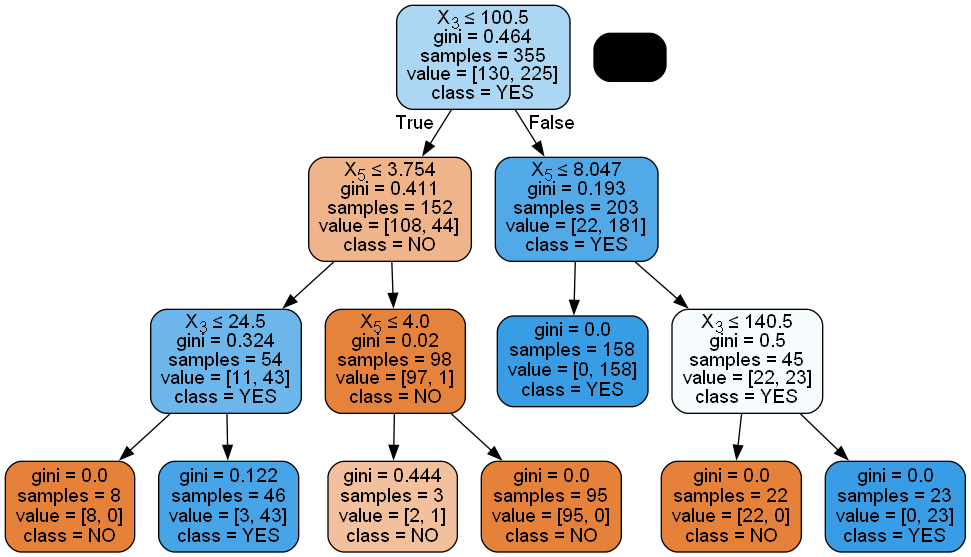

In [47]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=gini_model2.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gini_model2.png')
Image(graph.create_png())

#seçtiğimiz modelin görselleştirilmesi